# Predicting heart disease using Machine Learning 

A machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.

1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling 
6. Experimentation

## 1. Problem Definition

In a statement,

> Given cliical parameters of a patient, can we predict whether or not they have heart disease?

## 2. Data

Data obtained from the Cleavland data from the UCI Machine Learning Repository. https://archive.ics.uci.edu/ml/datasets/Heart+Disease


## 3. Evaluation

> If we can reach 95% accuracy in predicting whether or not a patient has heart disease during the proof of concept, we will pursue the project

## 4. Features

**Create data dictionary**

* age- age in years
* sex- (1 = male; 0 = female)
* cp- chest pain type
* trestbps- resting blood pressure (in mm Hg on admission to the hospital)
* chol- serum cholestoral in mg/dl
* fbs- (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* restecg- resting electrocardiographic results
* thalach- maximum heart rate achieved
* exang- exercise induced angina (1 = yes; 0 = no)
* oldpeak- ST depression induced by exercise relative to rest
* slope- the slope of the peak exercise ST segment
* ca- number of major vessels (0-3) colored by flourosopy
* thal- 3 = normal; 6 = fixed defect; 7 = reversable defect
* target- 1 or 0 

## Preparing the tools

The following tools are going to be used for data analysis, manipulation and modelling: 
* pandas 
* matplotlib
* numpy
* scikit-learn

In [3]:
# Import all the tools

# Regular exploratory data analysis and plotting libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# for the plots to appear inside the notebook

%matplotlib inline

# Models from scikit-learn

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model evaluations

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay


## Load data

In [4]:
df = pd.read_csv(r'C:\Users\USER\Desktop\Data\Heart Disease data.csv')
df.shape #(rows, columns)

(1025, 14)

## Data exploration 

Find out more about the data and become an expert on the dataset

In [5]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [6]:
df["target"].value_counts()

target
1    526
0    499
Name: count, dtype: int64

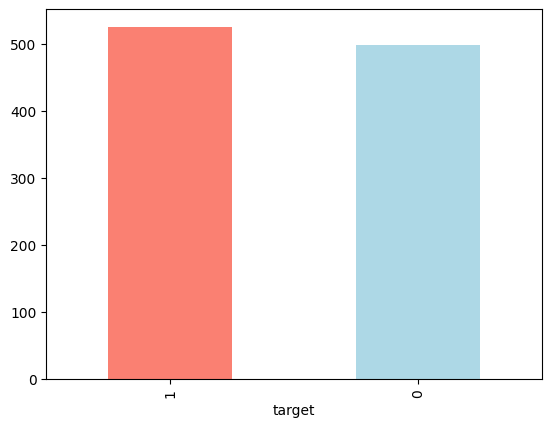

In [7]:
df["target"].value_counts().plot(kind="bar",color=["salmon","lightblue"]);

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [9]:
# check for missing values

df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart disease frequency according to sex

In [11]:
df.sex.value_counts()

sex
1    713
0    312
Name: count, dtype: int64

In [12]:
# compare target column with sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,86,413
1,226,300


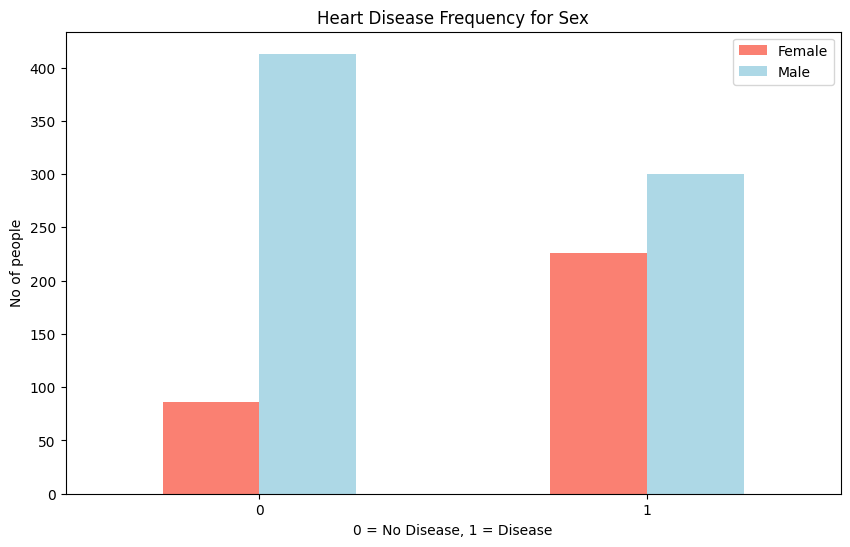

In [13]:
pd.crosstab(df.target, df.sex).plot(kind="bar", figsize=(10,6), color=["salmon","lightblue"])
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("No of people")
plt.legend(["Female","Male"]);
plt.xticks(rotation=0);

### Age vs Max heart rate for Heart Disease

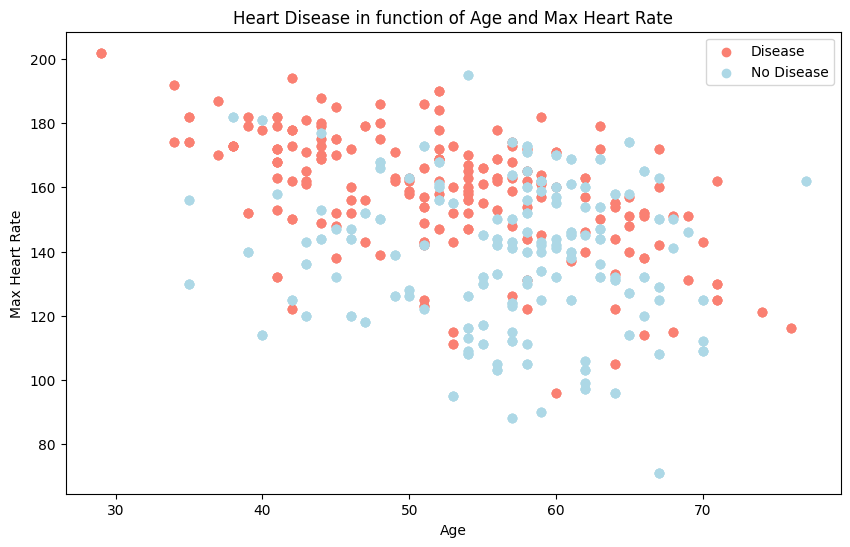

In [14]:
# create another figure

plt.figure(figsize=(10,6))

# scatter with positive examples
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c="salmon");

# scatter with negative exaples
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c="lightblue");

plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

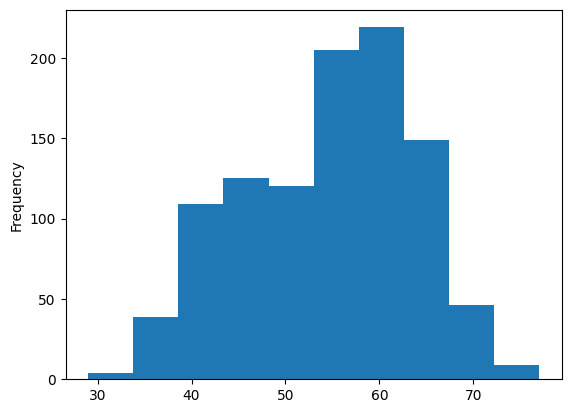

In [15]:
# Check the distribution of the age column with a histogram
df.age.plot.hist();

### Heart disease frequence per chest pain type

cp- chest pain type

* 0: Typical angina
* 1: Atypical angina
* 2: Non-angnial pain
* 3: Asymptomatic

In [16]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,375,122
1,33,134
2,65,219
3,26,51


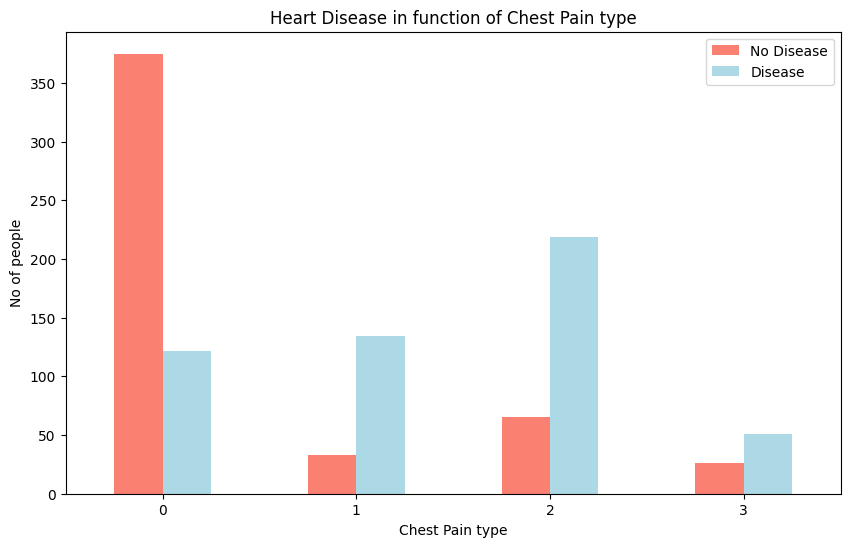

In [17]:
# Making it more visual

pd.crosstab(df.cp,df.target).plot(kind="bar", figsize=(10,6), color=["salmon","lightblue"])

plt.title("Heart Disease in function of Chest Pain type")
plt.xlabel("Chest Pain type")
plt.ylabel("No of people")
plt.legend(["No Disease", "Disease"]);
plt.xticks(rotation=0);

In [18]:
# Make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


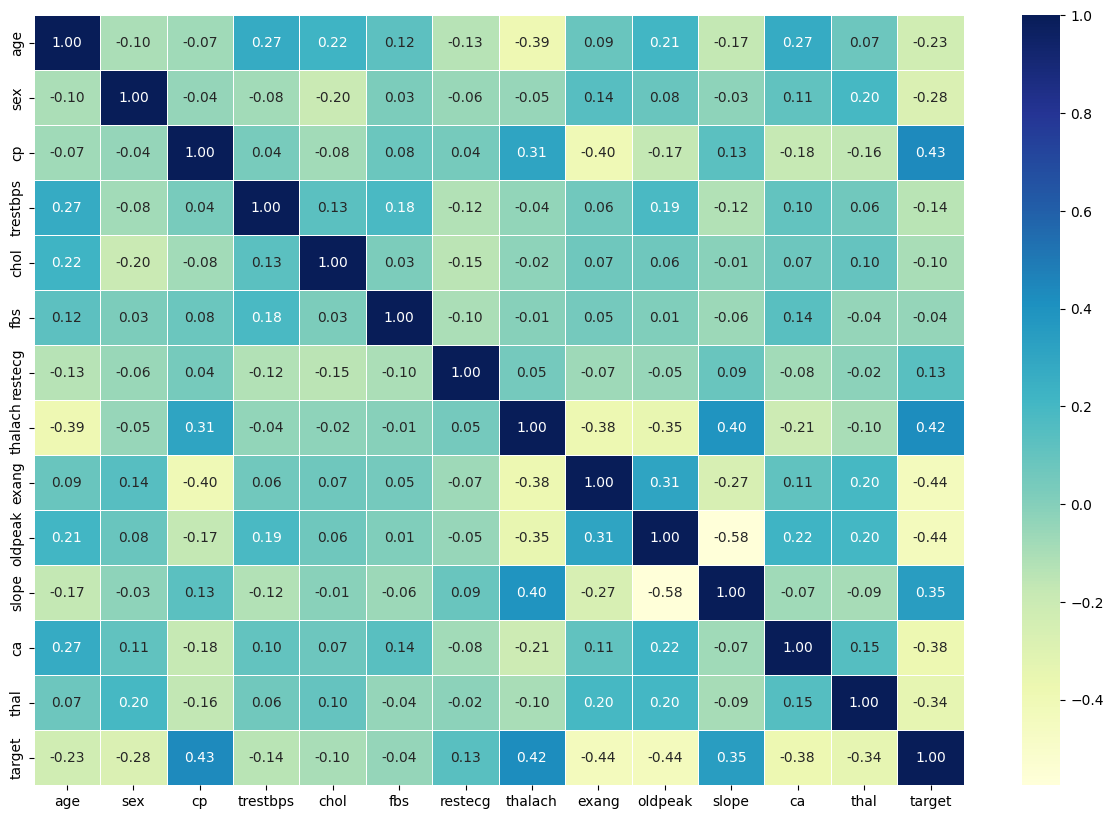

In [19]:
corr_matrix=df.corr()

fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");

## 5. Modelling

In [20]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [21]:
# Split data into X and y

X = df.drop("target",axis=1)
y = df["target"]

In [22]:
# Split the data into train and test split

np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [23]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
835,49,1,2,118,149,0,0,126,0,0.8,2,3,2
137,64,0,0,180,325,0,1,154,1,0.0,2,0,2
534,54,0,2,108,267,0,0,167,0,0.0,2,0,2
495,59,1,0,135,234,0,1,161,0,0.5,1,0,3
244,51,1,2,125,245,1,0,166,0,2.4,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,41,1,2,130,214,0,0,168,0,2.0,1,0,2
71,61,1,0,140,207,0,0,138,1,1.9,2,1,3
106,51,1,0,140,299,0,1,173,1,1.6,2,0,3
270,43,1,0,110,211,0,1,161,0,0.0,2,0,3


In [24]:
y_train

835    0
137    1
534    1
495    1
244    1
      ..
700    1
71     0
106    0
270    1
860    0
Name: target, Length: 820, dtype: int64

Trying 3 different machine learning models:
1. Logistic Regression
2. K-Nearest Neighbors Classifier
3. Random Forest Classifier

In [25]:
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

# function to fit and score models

def fit_and_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    model_scores = {}
    for name, model in models.items():
        #fit the model
        model.fit(X_train, y_train)
        #append the score of the model
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [26]:
model_scores = fit_and_score(models=models, 
                             X_train = X_train, 
                             X_test = X_test, 
                             y_train = y_train, 
                             y_test = y_test)
model_scores

C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.7853658536585366,
 'KNN': 0.7317073170731707,
 'Random Forest': 0.9853658536585366}

### Model comparison

In [27]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare

,Logistic Regression,KNN,Random Forest
accuracy,0.785366,0.731707,0.985366


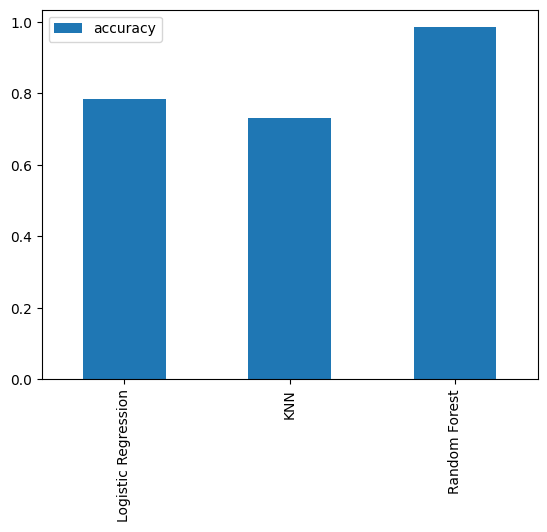

In [28]:
model_compare.T.plot.bar();

Checking out the following: 

* Hyperparameter tuning
* Feature importance
* Confusion matrix
* Cross-validation
* Precision
* Recall
* F1 score
* Classification report
* ROC curve
* Area under the curve (AUC)

### Hyperparameter tuning (by hand)

In [29]:
# tuning KNN

train_scores = []
test_scores = []

# create a list of different values for n neighbours

neighbours = range(1,21)

# setup KNN instance

knn = KNeighborsClassifier()

# loop through different n_neighbours

for i in neighbours:
    knn.set_params(n_neighbors=i)
    knn.fit(X_train, y_train)
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

In [30]:
train_scores

[1.0,
 0.9963414634146341,
 0.9914634146341463,
 0.947560975609756,
 0.9231707317073171,
 0.8207317073170731,
 0.7914634146341464,
 0.7926829268292683,
 0.7670731707317073,
 0.7853658536585366,
 0.775609756097561,
 0.7695121951219512,
 0.7609756097560976,
 0.7817073170731708,
 0.7670731707317073,
 0.7670731707317073,
 0.75,
 0.7597560975609756,
 0.7634146341463415,
 0.7682926829268293]

In [31]:
test_scores

[0.9853658536585366,
 0.9560975609756097,
 0.9024390243902439,
 0.8097560975609757,
 0.7317073170731707,
 0.6878048780487804,
 0.6780487804878049,
 0.6682926829268293,
 0.7170731707317073,
 0.7170731707317073,
 0.6878048780487804,
 0.6780487804878049,
 0.6780487804878049,
 0.7170731707317073,
 0.7073170731707317,
 0.6926829268292682,
 0.6780487804878049,
 0.7073170731707317,
 0.7121951219512195,
 0.7170731707317073]

Maximum KNN score on the test data: 98.54%


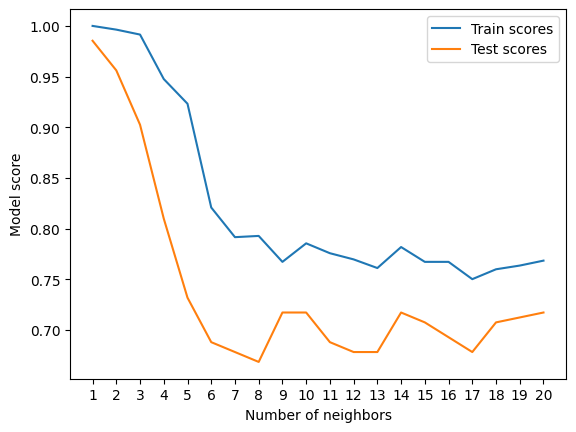

In [32]:
plt.plot(neighbours, train_scores, label = "Train scores")
plt.plot(neighbours, test_scores, label = "Test scores")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

### Hyperparameter tuning with RandomisedSearchCV

In [33]:
# create  hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# create  hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [34]:
# Tune LogisticRegression

np.random.seed(42)

rs_log_reg = RandomizedSearchCV(LogisticRegression(), 
                                param_distributions = log_reg_grid, 
                                cv = 5, 
                                n_iter = 20, 
                                verbose =  True)
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [35]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': np.float64(1.623776739188721)}

In [36]:
rs_log_reg.score(X_test, y_test)

0.7853658536585366

In [37]:
# Tune RandomForestClassifier

np.random.seed(42)

rs_rf = RandomizedSearchCV(RandomForestClassifier(), 
                           param_distributions = rf_grid, 
                           cv = 5, 
                           n_iter = 20, 
                           verbose =  True)
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [ ]:
rs_rf.best_params_

In [45]:
rs_rf.score(X_test, y_test)

0.926829268292683

### Hyperparameter tuning for GridSearchCV

In [40]:
log_reg_grid = {"C": np.logspace(-4, 4, 30),
                "solver": ["liblinear"]}
gs_log_reg = GridSearchCV(LogisticRegression(), 
                          param_grid = log_reg_grid, 
                          cv = 5, 
                          verbose =  True)
gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [41]:
gs_log_reg.best_params_

{'C': np.float64(1.3738237958832638), 'solver': 'liblinear'}

In [42]:
gs_log_reg.score(X_test, y_test)

0.7853658536585366

## Evaluating the model

* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score

In [48]:
# make predictions with tuned model
y_preds = gs_log_reg.predict(X_test)

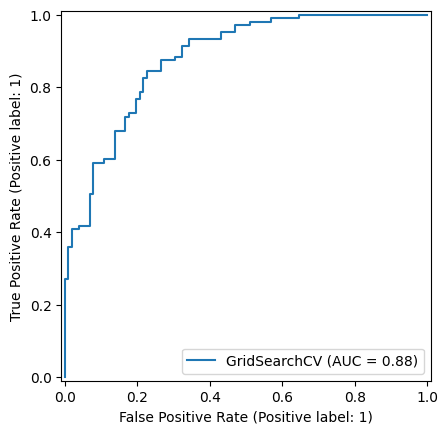

In [50]:
# plot ROC curve and calculate AUC metric
RocCurveDisplay.from_estimator(gs_log_reg, X_test, y_test)

In [51]:
# Confusion matrix
print(confusion_matrix(y_test,y_preds))

[[71 31]
 [13 90]]


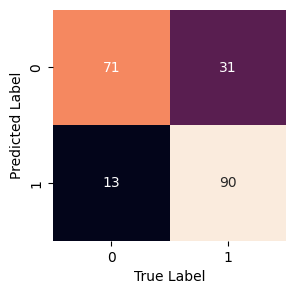

In [52]:
def plt_conf_mat(y_test, y_preds):
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, 
                     cbar=False)
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")
plt_conf_mat(y_test, y_preds);

In [53]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.85      0.70      0.76       102
           1       0.74      0.87      0.80       103

    accuracy                           0.79       205
   macro avg       0.79      0.78      0.78       205
weighted avg       0.79      0.79      0.78       205



### Calculate evaluation metrics using cross-validation

In [54]:
# Check best hyperparameters

gs_log_reg.best_params_

{'C': np.float64(1.3738237958832638), 'solver': 'liblinear'}

In [55]:
# create new classifier with best params
clf = LogisticRegression(C = 0.20433597178569418,
                         solver = "liblinear")

In [56]:
# cross-validated accuracy
cv_acc = np.mean(cross_val_score(clf,X,y,cv=5,scoring="accuracy"))
cv_acc

np.float64(0.8458536585365855)

In [57]:
# cross-validated precision
cv_prec = np.mean(cross_val_score(clf,X,y,cv=5,scoring="precision"))
cv_prec

np.float64(0.8140908250785517)

In [58]:
# cross-validated recall
cv_rec = np.mean(cross_val_score(clf,X,y,cv=5,scoring="recall"))
cv_rec

np.float64(0.9069362084456424)

In [59]:
# cross-validated f1-score
cv_f1 = np.mean(cross_val_score(clf,X,y,cv=5,scoring="f1"))
cv_f1

np.float64(0.8579960964556058)

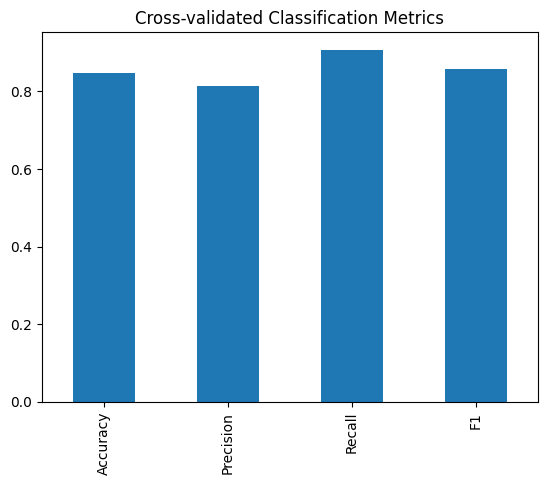

In [60]:
# visualise cross-validated metrics

cv_metrics = pd.DataFrame({
    "Accuracy": cv_acc,
    "Precision": cv_prec,
    "Recall": cv_rec,
    "F1": cv_f1
}, index=[0])
cv_metrics.T.plot.bar(title="Cross-validated Classification Metrics", legend=False);

### Feature Importance

i.e which features contributed most to the model?

In [61]:
# create new classifier with best params
clf = LogisticRegression(C = 0.20433597178569418,
                         solver = "liblinear")
clf.fit(X_train, y_train);

In [62]:
# check coef_
clf.coef_

array([[ 0.01575055, -1.26513808,  0.77534747, -0.01372214, -0.00699633,
        -0.14437762,  0.28403542,  0.03492756, -0.64220266, -0.62256937,
         0.4642864 , -0.75326623, -0.91923676]])

In [63]:
# match coef's of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': np.float64(0.015750554186900727),
 'sex': np.float64(-1.2651380841591688),
 'cp': np.float64(0.7753474701867764),
 'trestbps': np.float64(-0.013722139551678163),
 'chol': np.float64(-0.0069963296509373794),
 'fbs': np.float64(-0.1443776167043257),
 'restecg': np.float64(0.2840354185140649),
 'thalach': np.float64(0.034927563020949556),
 'exang': np.float64(-0.642202660527766),
 'oldpeak': np.float64(-0.62256937446592),
 'slope': np.float64(0.4642863995636753),
 'ca': np.float64(-0.7532662320267551),
 'thal': np.float64(-0.9192367570380775)}

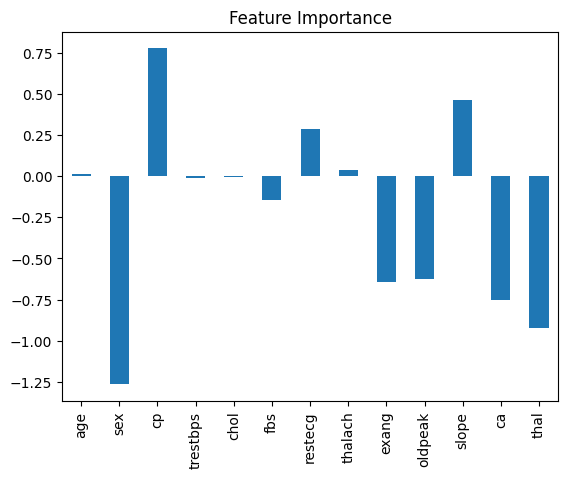

In [64]:
# visualise feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend = False);

## 6. Experimentation

* More data required
* New models - CatBoost or XGBoost
* Improving the current model

Heart disease is a major health issue globally, often resulting in severe complications or even death. In this project, we combined machine learning with a well-regarded public health dataset to pinpoint critical factors contributing to heart disease risk. By analyzing clinical features—such as age, cholesterol levels, chest pain type, and maximum heart rate achieved—we developed a predictive model to aid in heart disease diagnosis.